In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

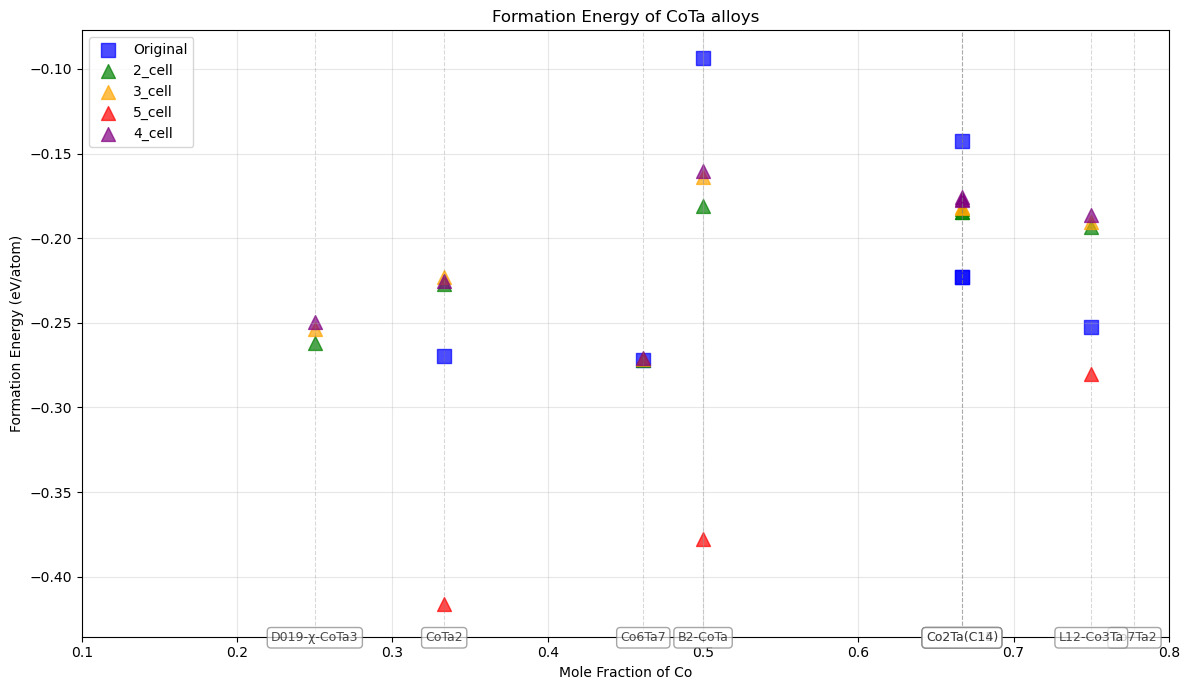

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

formation_excel_path = 'calculations/Ta_Co/formation.xlsx'
df = pd.read_excel(formation_excel_path)

# Dynamically identify plot columns
non_plot_columns = ['x', 'name', 'mole', 'Co', 'Ta']
plot_columns = [col for col in df.columns if col not in non_plot_columns]

# Control flags for each data series - set to False to hide
show_original = True
show_2_cell = True
show_3by3 = True
show_others = False
show_2on_old = False
show_new2 = False
show_5by5 = True
show_4by4 = True
show_new = False

# Custom markers and colors for specific columns
marker_styles = {
    'original': {'marker': 's', 'color': 'blue', 'label': 'Original', 'show': show_original},
    'old_data': {'marker': '^', 'color': 'red', 'label': 'on_original_data', 'show': show_2on_old},
    'new': {'marker': '^', 'color': 'green', 'label': 'on_original_data_modified_lammps', 'show': show_new},
    '2_cell': {'marker': '^', 'color': 'green', 'label': '2_cell', 'show': show_2_cell},
    '3by3': {'marker': '^', 'color': 'orange', 'label': '3_cell', 'show': show_3by3},
    '4by4': {'marker': '^', 'color': 'red', 'label': '4_cell', 'show': show_4by4},
    '5by5': {'marker': '^', 'color': 'purple', 'label': '5_cell', 'show': show_5by5},
}

plt.figure(figsize=(12, 7))

# First, get the y-range for positioning the labels
# We'll position labels near the bottom of the plot
y_min, y_max = float('inf'), float('-inf')
for col in plot_columns:
    for key, style in marker_styles.items():
        if key in col.lower() and style['show']:
            y_min = min(y_min, df[col].min())
            y_max = max(y_max, df[col].max())

# Add some padding
y_range = y_max - y_min
label_y_position = y_min - 0.05 * y_range  # Position 5% below minimum data point

# Plot data points with custom markers and colors
for col in plot_columns:
    # Find the matching style (check if column contains the key)
    style_found = False
    
    for key, style in marker_styles.items():
        if key in col.lower():  # Case-insensitive match
            if style['show']:  # Only plot if show flag is True
                plt.scatter(df['mole'], df[col], s=100, alpha=0.7, 
                           marker=style['marker'], color=style['color'],
                           label=style['label'])
            style_found = True
            break
    
    # If no specific style found and we want to show others
    if not style_found and show_others:
        plt.scatter(df['mole'], df[col], s=100, alpha=0.7, label=col)

# Add vertical lines and alloy names (HORIZONTAL, INSIDE PLOT)
for _, row in df.iterrows():
    mole_fraction = row['mole']
    alloy_name = row['name']
    
    # Add vertical line
    plt.axvline(x=mole_fraction, color='gray', linestyle='--', alpha=0.3, linewidth=0.8)
    
    # Add alloy name - HORIZONTAL and inside plot at bottom
    plt.text(mole_fraction, label_y_position, alloy_name, 
             rotation=0,  # Horizontal text
             verticalalignment='top', 
             horizontalalignment='center',
             fontsize=9, alpha=0.7,
             bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7, edgecolor='gray'))

plt.xlabel('Mole Fraction of Co')
plt.ylabel('Formation Energy (eV/atom)')
plt.title('Formation Energy of CoTa alloys')
plt.grid(True, alpha=0.3)
plt.legend()

# Adjust y-limits to accommodate the labels at bottom
plt.ylim(label_y_position - 0.01 * y_range, y_max + 0.05 * y_range)

# Regular x-axis steps
plt.xlim(0.1, 0.8)
plt.xticks(np.arange(0.1, 0.81, 0.1))

plt.tight_layout()
plt.show()